# **Data-Driven Segmentation of US Companies**

**Description:** The analysis was conducted on a comprehensive dataset encompassing the 100 largest US companies across various industries.

**Goal:** The primary goal was to gain a deeper understanding of the underlying structure and relationships within the dataset.


**Datasets:** https://www.kaggle.com/datasets/omikumarmakadia2121/100-largest-companies



**Technical Implementation**


*  Data processing libraries: NumPy، Pandas
*  Visualizing: plotly.express

*   Feature engineering: RareLabelEncoder
*   Clustering algorithms: K-means, DBSCAN, OPTICS


*   Optimization: Optuna









# **Import the neccessary libraries**

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
batrosjamali_largest_companies_in_the_united_states_by_revenue_path = kagglehub.dataset_download('batrosjamali/largest-companies-in-the-united-states-by-revenue')

print('Data source import complete.')


100%|██████████| 3.54k/3.54k [00:00<00:00, 4.95MB/s]

Extracting files...
Data source import complete.


In [ ]:
!pip install feature-engine optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans,  DBSCAN, OPTICS
from feature_engine.encoding import CountFrequencyEncoder, RareLabelEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# **Loading the data**

In [ ]:

# List the contents of the directory
for file in os.listdir('/root/.cache/kagglehub/datasets/batrosjamali/largest-companies-in-the-united-states-by-revenue/versions/1'):
    print(file)

file_path = os.path.join('/root/.cache/kagglehub/datasets/batrosjamali/largest-companies-in-the-united-states-by-revenue/versions/1', 'companies.csv')
df = pd.read_csv(file_path)
df.head(3)

companies.csv


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"


In [ ]:
df.tail(3)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"
99,100,Best Buy,Retail,"43,452",-6.1%,"85,000","Richfield, Minnesota"


# **What does each column represent?**

**Rank:** The position of the company in the list, based on revenue or other criteria.

**Name:** The name of the company.

**Industry**: The sector or industry in which the company operates.

**Revenue (USD millions):** The company's total revenue in millions of U.S. dollars.

**Revenue growth:** The percentage increase in the company's revenue compared to the previous period.

**Employees:** The total number of employees working at the company.

**Headquarters:** The location of the company's main office or headquarters.

# **Data overview(Index, Shape, Datatype, Checking missing values, Column names, Unique values)**

In [ ]:
def data_overview(df, separator="*", detailed=True):
  """Prints detailed information about a Pandas DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.
      separator (str, optional): A separator string to visually distinguish sections. Defaults to "*".
      detailed (bool, optional): Whether to include detailed information on unique values. Defaults to True.

  Returns:
      None
  """

  print(f"{separator * 80}")
  print("Data Overview:")
  print(f" Index:\n{df.index}")
  print(f"{separator * 80}")
  print(f" Shape: {df.shape}")
  print(f"{separator * 80}")
  print(f" Data Types:\n{df.dtypes}")  # Newline for better readability

  if detailed:  # Optional detailed information section
    print(f"{separator * 80}")
    print("Detailed Information:")
    print(f" Missing Values:\n{df.isna().sum()}")
    print(f"{separator * 80}")
    print(f" All Columns:\n{df.columns.tolist()}")
    print(f"{separator * 80}")
    print(f"  Unique Values:")

    # Improved handling of potential type errors during detailed unique value printing
    try:
      for col, n_unique in df.nunique().items():
        print(f"    - Column: {col}, Unique Values: {n_unique}")
    except TypeError as e:
      print(f"    - Warning: Some columns may not support unique value counting ({e})")

  print(f"{separator * 80}")


data_overview(df)

********************************************************************************
Data Overview:
 Index:
RangeIndex(start=0, stop=100, step=1)
********************************************************************************
 Shape: (100, 7)
********************************************************************************
 Data Types:
Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object
********************************************************************************
Detailed Information:
 Missing Values:
Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64
********************************************************************************
 All Column

# **Removing Duplicates**

In [ ]:
# checking for duplicate values in the Data
print("Sum of duplicate values :", df.duplicated().sum())
# print("The data shape before dropping duplicates :", df.shape)
# df_no_duplicates = df.drop_duplicates()

# # Print the DataFrame after removing duplicates
# print("The data shape after dropping duplicates :", df_no_duplicates.shape)

# df_no_duplicates

Sum of duplicate values : 0


# **Checking the Numerical and Categorical Features**

In [ ]:
#Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"The dataset contains {len(numerical_cols)} numerical features and {len(categorical_cols)} categorical features.")

# print("Numerical features:")
# data[numerical_cols]
print("Categorical features:")
df [categorical_cols]

The dataset contains 1 numerical features and 6 categorical features.
Categorical features:


,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...
95,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


# **Preprocessing**

 **1.Converting the first column to the main index of the data frame**

In [ ]:
"""
Since the "Rank" column contains row numbers, we will either remove it or use it as an index.
"""
df = df.set_index(df.columns[0])
# del df['Rank']
# df = df.drop('Rank', axis=1, inplace=True)

**2.Converting the data type of the 'Revenue growth' column to string and removing the percent character**

In [ ]:
"""
To improve statistical analysis, we have removed the % sign from this column.
"""

#  1.The first solution - Convert to string and remove percentage
df['Revenue growth'] = df['Revenue growth'].astype(str).str.rstrip('%')
# 2.The second solution - Use the to_numeric function
# df['Revenue growth'] = pd.to_numeric(df['Revenue growth'], errors='coerce')





**3.Data cleaning: Removing commas from numeric columns**

In [ ]:
def remove_comma(x):
    return x.replace(',', '')

df['Revenue (USD millions)'] = df['Revenue (USD millions)'].apply(remove_comma)
df['Employees'] = df['Employees'].apply(remove_comma)


**4.Coercing selected columns to numeric data type**

In [ ]:
"""
We have also changed the type of these two columns from object to numeric.
"""
for column in ['Revenue (USD millions)', 'Revenue growth', 'Employees']:
    df[column] = pd.to_numeric(df[column], errors='coerce')


print("Data after preprocessing")
df.head(3)


Data after preprocessing


,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"


**5.Type casting categorical columns to category dtype**

In [ ]:
columns_to_convert = ['Name', 'Industry', 'Headquarters']
# Convert the specified columns to 'category' data type
df[columns_to_convert] = df[columns_to_convert].astype('category')
print("Data after type casting")
df.dtypes

Data after type casting


,0
Name,category
Industry,category
Revenue (USD millions),int64
Revenue growth,float64
Employees,int64
Headquarters,category


# **Numerical Data Summary and Distribution Analysis**

In [ ]:
numerical_columns = df.select_dtypes(exclude=['category']).columns.tolist()
# Get basic statistics using describe()
num_desc = df[numerical_columns].describe().T

# Add range and variance to the describe DataFrame
num_desc['range'] = num_desc['max'] - num_desc['min']
num_desc['variance'] = df[numerical_columns].var()
num_desc['skewness'] = df[numerical_columns].skew()
num_desc['kurtosis'] = df[numerical_columns].kurtosis()
num_desc['std_dev'] = df[numerical_columns].std()

# Print the result
num_desc.round(3)


,count,mean,std,min,25%,50%,75%,max,range,variance,skewness,kurtosis,std_dev
Revenue (USD millions),100.0,122346.090,107882.042,43452.0,54608.500,80296.00,149927.250,648125.0,604673.0,1.163853e+10,2.573,7.961,107882.042
Revenue growth,100.0,6.078,21.023,-41.7,-6.175,5.95,13.025,125.9,167.6,4.419660e+02,2.173,10.306,21.023
Employees,100.0,162677.930,266902.401,4137.0,45000.000,86500.00,189162.500,2100000.0,2095863.0,7.123689e+10,5.339,34.089,266902.401


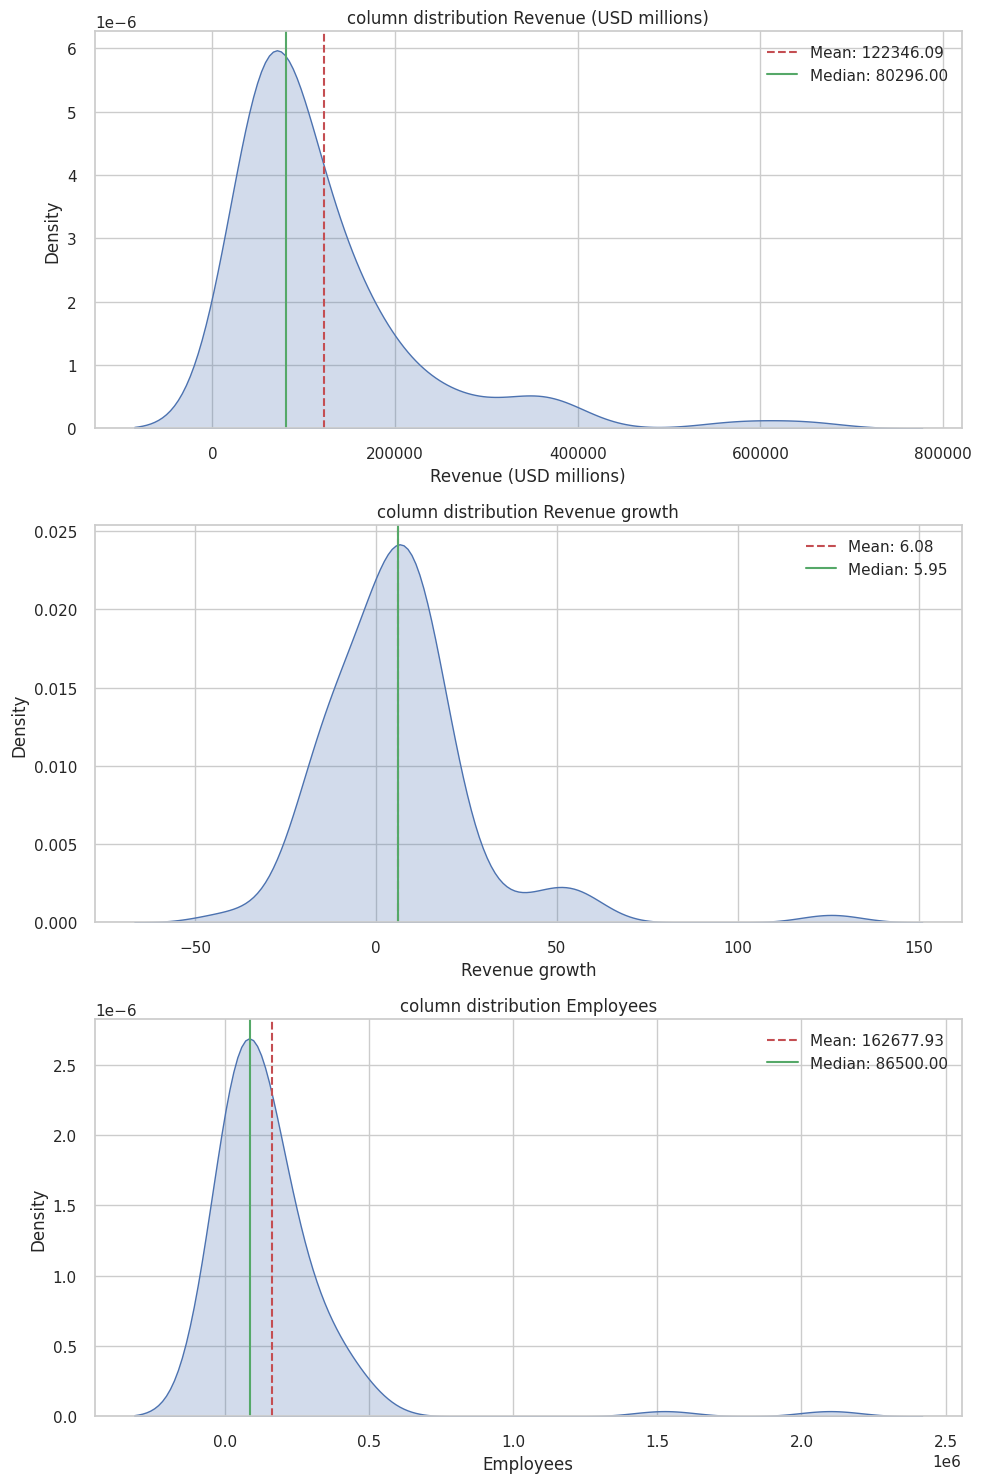

In [ ]:
# Create subgraphs
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 5*len(numerical_columns)))

# Draw a density chart for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, fill=True, ax=axes[i])

    # Access the mean and median from the num_descdataframe
    mean_value = num_desc.loc[column, 'mean']
    median_value = num_desc.loc[column, '50%']

    # Add vertical lines for mean and median with value display
    axes[i].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

    # Add title and legend
    axes[i].set_title(f'column distribution {column}')
    axes[i].legend()

# Adjust the spacing between sub-diagrams
plt.tight_layout()


plt.show()

# **Categorical Data Summary**

In [ ]:
# Get basic statistics for categorical columns
cat_desc = df.select_dtypes(include=['category']).describe().T
# Calculate mode for each categorical column and add it to the summary
cat_desc['mode'] = df.select_dtypes(include=['category']).mode().iloc[0]
# Show updated statistics with mode
cat_desc

,count,unique,top,freq,mode
Name,100,100,AIG,1,AIG
Industry,100,37,Financials,13,Financials
Headquarters,100,72,"New York City, New York",13,"New York City, New York"


In [ ]:
# # Changing the format of data to long format (Long Format)
# df_long = df.melt(value_vars=numerical_columns, var_name="Variable", value_name="Value")

# # Draw a box plot for all numeric columns
# fig = px.box(df_long, x="Variable", y="Value", color="Variable", title="Box plot for all numerical columns")
# fig.show()


# **Identify outliers**

In [ ]:
# Loop to plot each numerical column
for column in numerical_columns:
    # Create subplots with one row and two columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Box plot for {column}", f"Violin plot for {column}"))

    # Add box plot to the first subplot
    fig.add_trace(
        go.Box(y=df[column], name=f"{column} - Box"),
        row=1, col=1
    )

    # Add violin plot to the second subplot
    fig.add_trace(
        go.Violin(y=df[column], name=f"{column} - Violin", box_visible=True, points="all"),
        row=1, col=2
    )

    # Update layout title and display the figure
    fig.update_layout(title_text=f"Box and Violin plots for {column}", showlegend=False)
    fig.show()

In [ ]:
def find_outliers_iqr(df, column, factor=1.5):
  """
  This function identifies outliers in a specified column of a DataFrame using the Interquartile Range (IQR) method.

  Args:
    df: The DataFrame containing the data.
    column: The name of the column to check for outliers.
    factor: The factor used to calculate the outlier boundaries (default is 1.5).

  Returns:
    A Series containing the identified outliers.
  """

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - factor * IQR
  upper_bound = Q3 + factor * IQR

  outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

In [ ]:
for col in numerical_columns:
    outliers = find_outliers_iqr(df, col)
    print(f"Outlier data in {col}:", outliers)

Outlier data in Revenue (USD millions): Rank
1    648125
2    574785
3    383482
4    371622
5    364482
6    357776
7    344582
8    307394
Name: Revenue (USD millions), dtype: int64
Outlier data in Revenue growth: Rank
12     54.7
18     49.4
21     55.1
35     57.8
41     45.9
65    125.9
69    -41.7
Name: Revenue growth, dtype: float64
Outlier data in Employees: Rank
1     2100000
2     1525000
4      440000
23     463100
25     414000
37     415000
46     446400
Name: Employees, dtype: int64


# **Compare Company Performance Based on Metric (Top 20 vs Bottom 20)**

In [ ]:
def plot_comparison(df, x, y, color_col):
    # Sort DataFrame by column y (Revenue)
    df_sorted = df.sort_values(by=y, ascending=False)

    # Taking 20 companies with the highest and lowest value
    top_20 = df_sorted.head(20)
    bottom_20 = df_sorted.tail(20)

    # The combination of the first and last 20 companies
    combined_df = pd.concat([top_20, bottom_20])

    # Draw a column chart with color by industry
    fig = px.bar(
        combined_df,
        x=x,
        y=y,
        text=y,
        title=f'Comparison of Companies by {y} (Top 20 vs Bottom 20)',
        labels={y: y},
        color=color_col,   # Color by industry
        color_continuous_scale='Cividis',  # Setting a distinct color scale
        orientation='v'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-45, xaxis={'categoryorder': 'total descending'})  # Setting the order of the x-axis based on (Revenue)
    fig.show()


In [ ]:
plot_comparison(df, x='Name', y='Revenue (USD millions)', color_col='Industry')

In [ ]:
plot_comparison(df, x='Name', y='Employees', color_col='Industry')

In [ ]:
plot_comparison(df, x='Name', y='Revenue growth', color_col='Industry')

# **Create a grouped bar chart to visualize the count of each group**

In [ ]:
def create_grouped_bar_plot(df, groupby_column, title='Distribution of Companies Across Different Categories',
                             color_column=None, width=800, height=1000):
  """
  Creates a grouped bar chart to visualize the count of each group.

  Args:
      df: The DataFrame containing the data.
      groupby_column: The column to group the data by.
      title: The title of the plot.
      color_column: The column to use for coloring the bars.
      width: Width of the figure in pixels.
      height: Height of the figure in pixels.

  Returns:
      None
  """

  # Group the data and count the occurrences
  counts = df.groupby(groupby_column).size().reset_index(name='Count')
  counts = counts.sort_values(by='Count', ascending=False)

  # Create the bar chart
  fig = px.bar(counts, x='Count', y=groupby_column,
                title=title,
                labels={'Count': 'Number of Companies'},
                color=color_column)

  # Set the figure size
  fig.update_layout(width=width, height=height)

  fig.show()


**1.Number of Companies per Industry**

In [ ]:
create_grouped_bar_plot(df, 'Industry',title='Number of Companies per Industry', color_column='Industry')


**2.Number of Companies per Headquarters**

In [ ]:
create_grouped_bar_plot(df, 'Headquarters',title='Number of Companies per Headquarters', color_column='Headquarters')

# **Headquarters-wise Average Company Metrics**

In [ ]:
# # Data grouping based on headquarters and calculations
grouped_Headquarters = df.groupby(['Headquarters']).agg({'Employees': 'mean',
                                                         'Revenue (USD millions)': 'mean',
                                                         'Revenue growth': 'mean'})


# grouped_Headquarters = grouped_Headquarters.reset_index()
# Sort the grouped DataFrame by the 'Revenue (USD millions)' column in descending order
grouped_Headquarters = grouped_Headquarters.sort_values(by='Revenue (USD millions)', ascending=False)
grouped_Headquarters


,Employees,Revenue (USD millions),Revenue growth
Headquarters,,,
"Bentonville, Arkansas",2100000.0,648125.0,6.0
"Seattle, Washington",1525000.0,574785.0,11.9
"Cupertino, California",161000.0,383482.0,-2.8
"Minnetonka, Minnesota",440000.0,371622.0,14.6
"Omaha, Nebraska",396500.0,364482.0,20.7
...,...,...,...
"Framingham, Massachusetts",329000.0,49936.0,2.9
"Doral, Florida",5289.0,47711.0,-19.2
"Inver Grove Heights, Minnesota",10609.0,45590.0,-4.6


 # **Visualize Categorical Data Distribution as Pie Chart**

In [ ]:
def create_pie_chart(df, group_by_column, value_column, agg_func='sum', title='', width=1000, height=800):
    """
    Creates a pie chart based on the specified DataFrame, grouping column, and value column.

    Args:
      df: The DataFrame to be analyzed.
      group_by_column: The column to group the data by.
      value_column: The column containing the values to be aggregated.
      agg_func: The aggregation function to apply (e.g., 'sum', 'mean', 'count').
      title: The title of the pie chart.
      width: The width of the pie chart.
      height: The height of the pie chart.

    Returns:
      A plotly figure object.
    """
    df_grouped = df.groupby(group_by_column)[value_column].agg(agg_func)
    fig = px.pie(df_grouped, values=value_column, names=df_grouped.index, title=title, width=width, height=height)
    return fig





 **1.Industry-wise Revenue Comparison**

In [ ]:
fig = create_pie_chart(df, 'Industry', 'Revenue (USD millions)', 'mean', 'Breakdown of Revenue Across Industries')
fig.show()

In [ ]:
cloud_industry = df[df['Industry'] == 'Retail and cloud computing']
cloud_industry


,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"


 **2.Industry-wise Average Revenue Growth**

In [ ]:
fig = create_pie_chart(df, 'Industry', 'Revenue growth', 'sum', 'Industry-wise Average Revenue Growth')
fig.show()

**3.Number of Employees in Each Industry**

In [ ]:
fig = create_pie_chart(df, 'Industry', 'Employees', 'mean', 'Number of Employees in Each Industry')
fig.show()


# **Analysis of the correlation between workforce and company income**

In [ ]:
def plot_scatter(df, x_col, y_col):
    """
    Creates a scatter plot for two specified columns in a DataFrame.

    Args:
        df: The DataFrame containing the data.
        x_col: The name of the column to be used for the x-axis.
        y_col: The name of the column to be used for the y-axis.
    """

    fig = px.scatter(df, x=x_col, y=y_col)
    fig.show()

Based on this scatter plot, it can be inferred that the number of employees is one factor influencing a company's revenue. However, this is not the sole determinant, as other variables also play a role in shaping a company's earnings.

In [ ]:
plot_scatter(df, 'Employees', 'Revenue (USD millions)')

In [ ]:
plot_scatter(df, 'Employees', 'Revenue growth')

In [ ]:
plot_scatter(df, 'Revenue (USD millions)', 'Revenue growth')

# **Exploring the Relationship Between Employees, Revenue Growth, and Revenue**

In [ ]:
unique_industries = df['Industry'].unique()

# Create a color mapping dictionary
color_map = {industry: color for industry, color in zip(unique_industries, px.colors.qualitative.Plotly)}

fig = px.scatter_3d(
    df,
    x='Employees',
    y='Revenue growth',
    z='Revenue (USD millions)',
    color=df['Industry'],
    color_discrete_map=color_map,
    opacity=0.7
)

fig.show()

# **Categorizing Revenue Growth: Positive, Negative, and Zero**

In [ ]:
# Calculating the number of positive numbers
positive_count = (df['Revenue growth'] > 0).sum()

# Calculating the number of negative numbers
negative_count = (df['Revenue growth'] < 0).sum()

# Calculating the number of zero numbers
zero_count = (df['Revenue growth'] == 0) .sum()

print("Number of positive Revenue growth:", positive_count)
print("Number of negative Revenue growth:", negative_count)
print("Number of zero Revenue growth:", zero_count)

Number of positive Revenue growth: 64
Number of negative Revenue growth: 36
Number of zero Revenue growth: 0


In [ ]:
data = pd.DataFrame({
    'Type': ['Positive', 'Negative', 'Zero'],
    'Count': [positive_count, negative_count, zero_count]
})


fig = px.pie(data, values='Count', names='Type',
             title='Revenue Growth Distribution',
             color_discrete_sequence=['#2ca02c', '#d62728', '#1f77b4'])
fig.show()

# **Categorizing Companies Based on Employee Count**

In [ ]:
# define a threshold for 'Employees' to categorize cars
threshold = 1000000

# Add a new column 'PRICE_CATEGORY' using np.where
df['Employees_CATEGORY'] = np.where(df['Employees'] > threshold, 'Large Company', 'Small Company')

# Print the DataFrame with the new column
print("DataFrame with the new 'CATEGORY' column using np.where:")
df.head()


DataFrame with the new 'CATEGORY' column using np.where:


,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Employees_CATEGORY
Rank,,,,,,,
1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas",Large Company
2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington",Large Company
3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California",Small Company
4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota",Small Company
5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska",Small Company


In [ ]:
category_counts = df['Employees_CATEGORY'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']


fig = px.pie(category_counts, values='Count', names='Category',
             title='Distribution of Companies by Size',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.show()

# **Data encoding**

In [ ]:
df = df.drop(['Name','Employees_CATEGORY'], axis=1)

In [ ]:
# Create a RareLabelEncoder to handle rare categories in 'Industry' and 'Headquarters' columns
rare_encoder = RareLabelEncoder(
    tol=0.02,  # Keep categories that represent more than 2% of the data
    n_categories=3,  # Maximum 5 categories per variable
    variables=['Industry', 'Headquarters'],
    ignore_format=True,
)

# Fit and transform the data using the rare label encoder
df_encoded = rare_encoder.fit_transform(df)

# Perform one-hot encoding on the encoded data
df_encoded = pd.get_dummies(df_encoded, columns=['Industry', 'Headquarters'], drop_first=True)


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Display the first few rows of the one-hot encoded DataFrame

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,Revenue (USD millions),Revenue growth,Employees,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,Industry_Apparel,Industry_Automotive and energy,Industry_Automotive industry,Industry_Beverage,...,"Headquarters_San Ramon, California","Headquarters_Santa Clara, California","Headquarters_Seattle, Washington","Headquarters_Spring, Texas","Headquarters_Springdale, Arkansas","Headquarters_St. Louis, Missouri","Headquarters_Stamford, Connecticut","Headquarters_Washington, D.C.","Headquarters_Woonsocket, Rhode Island",Headquarters_Rare
0,4.898199,-0.003729,7.295108,0.0,0.0,-0.175863,0.0,0.0,-0.142857,-0.142857,...,0.0,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497
1,4.214957,0.278330,5.129910,0.0,0.0,-0.175863,0.0,0.0,-0.142857,-0.142857,...,0.0,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497
2,2.432763,-0.424427,-0.006318,0.0,0.0,-0.175863,0.0,0.0,-0.142857,-0.142857,...,0.0,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497
3,2.322275,0.407408,1.044274,0.0,0.0,-0.175863,0.0,0.0,-0.142857,-0.142857,...,0.0,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497
4,2.255758,0.699028,0.880472,0.0,0.0,-0.175863,0.0,0.0,-0.142857,-0.142857,...,0.0,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497


# **K-means**

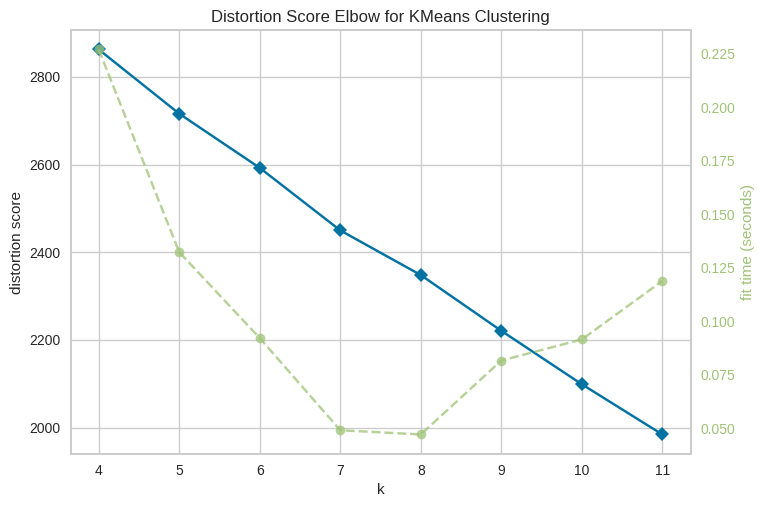

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans( init='k-means++', n_init=10, max_iter=300, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()


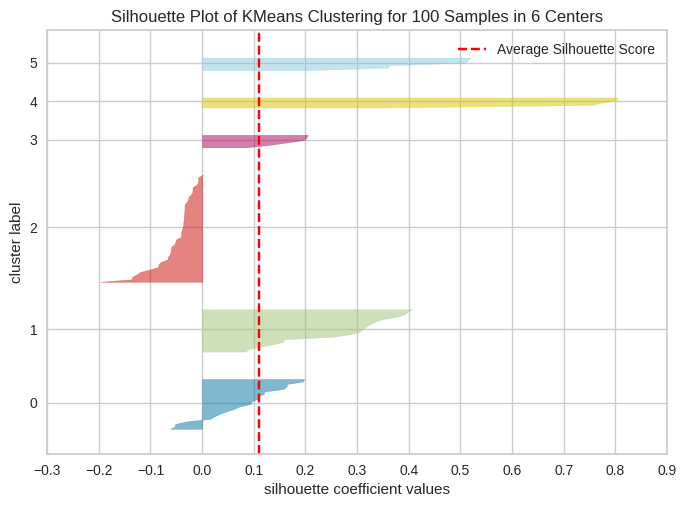

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


In [ ]:
# Assuming df_scaled contains scaled data

# Step 1: Apply KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Step 2: Get cluster labels
labels = kmeans.labels_

# Step 3: Calculate evaluation metrics
silhouette_kmeans = silhouette_score(df_scaled, labels)
calinski_kmeans = calinski_harabasz_score(df_scaled, labels)
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, labels)

# Print the results
print(f'Silhouette Coefficient: {silhouette_kmeans:.4f}')
print(f'Calinski-Harabasz Index: {calinski_kmeans:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}')



Silhouette Coefficient: 0.1060
Calinski-Harabasz Index: 3.9263
Davies-Bouldin Index: 1.6237


In [ ]:
df['kmean_cluster'] = labels

# # Centers of clusters
centers = kmeans.cluster_centers_

In [ ]:
def objective(trial):
    """Defines the objective function for Optuna optimization.

    Args:
        trial: A trial object used to define hyperparameters.

    Returns:
        float: The negative silhouette score, which is to be minimized.
    """

    # Suggest hyperparameters for KMeans
    n_clusters = trial.suggest_int("n_clusters", 2, 10)  # Number of clusters
    max_iter = trial.suggest_int("max_iter", 100, 500)  # Maximum number of iterations
    tol = trial.suggest_float("tol", 1e-4, 1e-2, log=True)  # Tolerance for the stopping criterion

    # Create a KMeans model with suggested hyperparameters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=max_iter, tol=tol, random_state=42)
    kmeans.fit(df_scaled)

    # Calculate the silhouette score
    try:
        silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    except ValueError:
        # Handle cases where silhouette score cannot be computed (e.g., if all samples are assigned to the same cluster)
        return float("-inf")

    return -silhouette_avg  # Negative silhouette score to maximize

# Create a study with early stopping
study = optuna.create_study(sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
print("Best value:", study.best_value)
print("Best params:", study.best_params)


[I 2024-11-06 07:36:18,576] A new study created in memory with name: no-name-84d35180-7e27-4833-91a0-2198cb3eb7bb
[I 2024-11-06 07:36:18,629] Trial 0 finished with value: -0.14194090158710101 and parameters: {'n_clusters': 8, 'max_iter': 366, 'tol': 0.0005999363995193461}. Best is trial 0 with value: -0.14194090158710101.
[I 2024-11-06 07:36:18,663] Trial 1 finished with value: -0.07195865011282657 and parameters: {'n_clusters': 4, 'max_iter': 347, 'tol': 0.004156508738395192}. Best is trial 0 with value: -0.14194090158710101.
[I 2024-11-06 07:36:18,714] Trial 2 finished with value: -0.04731264058149583 and parameters: {'n_clusters': 3, 'max_iter': 381, 'tol': 0.0031544068599793176}. Best is trial 0 with value: -0.14194090158710101.
[I 2024-11-06 07:36:18,765] Trial 3 finished with value: -0.11024703765628562 and parameters: {'n_clusters': 6, 'max_iter': 207, 'tol': 0.0022125056012519424}. Best is trial 0 with value: -0.14194090158710101.
[I 2024-11-06 07:36:18,817] Trial 4 finished wi

Best value: -0.18298511069433065
Best params: {'n_clusters': 10, 'max_iter': 485, 'tol': 0.0006451862458745467}


In [ ]:
best_n_clusters = study.best_params["n_clusters"]
kmeans_optuna = KMeans(n_clusters=best_n_clusters, init='k-means++', n_init=10, max_iter=study.best_params["max_iter"], tol=study.best_params["tol"], random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the main dataframe
df['cluster_optuna'] = kmeans.labels_


                        Industry  Revenue (USD millions)  Revenue growth  \
Rank                                                                       
1                         Retail                  648125             6.0   
2     Retail and cloud computing                  574785            11.9   
3           Electronics industry                  383482            -2.8   
4                     Healthcare                  371622            14.6   
5                   Conglomerate                  364482            20.7   

      Employees           Headquarters  kmean_cluster  cluster_optuna  
Rank                                                                   
1       2100000  Bentonville, Arkansas              2               2  
2       1525000    Seattle, Washington              2               2  
3        161000  Cupertino, California              3               3  
4        440000  Minnetonka, Minnesota              3               3  
5        396500        Omaha, Nebra

In [ ]:
# Calculate evaluation metrics
silhouette_avg = silhouette_score(df_scaled, labels)
calinski_harabasz_score_value = calinski_harabasz_score(df_scaled, labels)
davies_bouldin_score_value = davies_bouldin_score(df_scaled, labels)

# Print the results
print(f'Silhouette Coefficient: {silhouette_avg:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_score_value:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_score_value:.4f}')

Silhouette Coefficient: 0.1060
Calinski-Harabasz Index: 3.9263
Davies-Bouldin Index: 1.6237


# **DBSCAN**

In [ ]:
def objective(trial):
    """Defines the objective function for Optuna optimization.

    Args:
        trial: A trial object used to define hyperparameters.

    Returns:
        float: The silhouette score, which is to be maximized.
    """

    # Suggest hyperparameters for DBSCAN
    eps = trial.suggest_float("eps", 0.1, 1.0)  # Epsilon parameter for DBSCAN
    min_samples = trial.suggest_int("min_samples", 3, 10)  # Minimum number of samples in a neighborhood
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "cosine"])  # Distance metric

    # Create a DBSCAN model with suggested hyperparameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(df_scaled)

    # Handle cases where only one or no clusters are found
    if len(set(labels)) <= 1:
        return -1.0  # Assign a low score to penalize poor clustering

    # Calculate the silhouette score
    score = silhouette_score(df_scaled, labels, metric=metric)
    return score

# Create a study and optimize the objective
study = optuna.create_study(direction="maximize")  # Maximize the silhouette score
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and score
print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2024-11-06 07:37:39,877] A new study created in memory with name: no-name-c901396a-4ba3-495e-9be9-5a69a2d19664
[I 2024-11-06 07:37:39,894] Trial 0 finished with value: -1.0 and parameters: {'eps': 0.9466366978335476, 'min_samples': 5, 'metric': 'manhattan'}. Best is trial 0 with value: -1.0.
[I 2024-11-06 07:37:39,906] Trial 1 finished with value: -1.0 and parameters: {'eps': 0.7183879225658851, 'min_samples': 9, 'metric': 'euclidean'}. Best is trial 0 with value: -1.0.
[I 2024-11-06 07:37:39,941] Trial 2 finished with value: 0.24371114270136363 and parameters: {'eps': 0.49824213999696354, 'min_samples': 8, 'metric': 'cosine'}. Best is trial 2 with value: 0.24371114270136363.
[I 2024-11-06 07:37:39,961] Trial 3 finished with value: -1.0 and parameters: {'eps': 0.9030570458264431, 'min_samples': 9, 'metric': 'manhattan'}. Best is trial 2 with value: 0.24371114270136363.
[I 2024-11-06 07:37:39,982] Trial 4 finished with value: -1.0 and parameters: {'eps': 0.3375547513399706, 'min_samp

Best params: {'eps': 0.4515256597885273, 'min_samples': 3, 'metric': 'cosine'}
Best score: 0.4340615455480244


In [ ]:
# Extract the best hyperparameters from Optuna's study
best_params = study.best_params
best_eps = best_params["eps"]
best_min_samples = best_params["min_samples"]
best_metric = best_params["metric"]

# Create a DBSCAN model with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric=best_metric)
labels = dbscan.fit_predict(df_scaled)

# If more than one cluster is found, calculate evaluation metrics
if len(set(labels)) > 1:
    # Calculate silhouette score
    silhouette_dbscan = silhouette_score(df_scaled, labels, metric=best_metric)
    # Calculate Calinski-Harabasz index
    calinski_dbscan = calinski_harabasz_score(df_scaled, labels)
    # Calculate Davies-Bouldin index
    davies_bouldin_dbscan = davies_bouldin_score(df_scaled, labels)

    # Print the evaluation metrics
    print(f'Silhouette Coefficient: {silhouette_dbscan:.4f}')
    print(f'Calinski-Harabasz Index: {calinski_dbscan:.4f}')
    print(f'Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}')
else:
    print("Only one or no clusters were found.")


Silhouette Coefficient: 0.4341
Calinski-Harabasz Index: 5.1513
Davies-Bouldin Index: 1.9303


In [ ]:
df['dbscan_cluster'] = labels


# **OPTICS**

In [ ]:

def objective(trial):
    """Defines the objective function for Optuna optimization.

    Args:
        trial: A trial object used to define hyperparameters.

    Returns:
        float: The silhouette score, which is to be maximized.
    """

    # Suggest hyperparameters for OPTICS
    max_eps = trial.suggest_float("max_eps", 0.1, 2.0)  # Maximum distance between two samples for one to be considered as a neighbor
    min_samples = trial.suggest_int("min_samples", 3, 10)  # Minimum number of samples in a neighborhood for a point to be considered as a core point
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "cosine"])  # Distance metric

    # Create an OPTICS model with suggested hyperparameters
    optics = OPTICS(max_eps=max_eps, min_samples=min_samples, metric=metric)
    labels = optics.fit_predict(df_scaled)

    # Handle cases where only one or no clusters are found
    if len(set(labels)) <= 1:
        return -1.0  # Assign a low score to penalize poor clustering

    # Calculate the silhouette score
    score = silhouette_score(df_scaled, labels, metric=metric)
    return score

# Create a study and optimize the objective
study = optuna.create_study(direction="maximize")  # Maximize the silhouette score
study.optimize(objective, n_trials=50)

# Extract the best hyperparameters from Optuna's study
best_params = study.best_params
best_max_eps = best_params["max_eps"]
best_min_samples = best_params["min_samples"]
best_metric = best_params["metric"]

# Create an OPTICS model with the best hyperparameters
optics = OPTICS(max_eps=best_max_eps, min_samples=best_min_samples, metric=best_metric)
labels = optics.fit_predict(df_scaled)

# If more than one cluster is found, calculate evaluation metrics
if len(set(labels)) > 1:
    # Calculate evaluation metrics
    silhouette_optics = silhouette_score(df_scaled, labels, metric=best_metric)
    calinski_optics = calinski_harabasz_score(df_scaled, labels)
    davies_bouldin_optics = davies_bouldin_score(df_scaled, labels)

    # Print the results
    print(f'Best params: {best_params}')
    print(f'Silhouette Coefficient: {silhouette_optics:.4f}')
    print(f'Calinski-Harabasz Index: {calinski_optics:.4f}')
    print(f'Davies-Bouldin Index: {davies_bouldin_optics:.4f}')
else:
    print("Only one or no clusters were found.")

[I 2024-11-06 07:39:30,418] A new study created in memory with name: no-name-bced44b2-0f1a-454c-8117-ded5698ec4ce
[I 2024-11-06 07:39:31,209] Trial 0 finished with value: 0.23403988755226363 and parameters: {'max_eps': 1.9076292439173794, 'min_samples': 8, 'metric': 'cosine'}. Best is trial 0 with value: 0.23403988755226363.
[I 2024-11-06 07:39:31,227] Trial 1 finished with value: -1.0 and parameters: {'max_eps': 0.726807968404702, 'min_samples': 10, 'metric': 'manhattan'}. Best is trial 0 with value: 0.23403988755226363.
[I 2024-11-06 07:39:31,258] Trial 2 finished with value: -1.0 and parameters: {'max_eps': 0.4868638112257493, 'min_samples': 10, 'metric': 'manhattan'}. Best is trial 0 with value: 0.23403988755226363.
[I 2024-11-06 07:39:31,338] Trial 3 finished with value: -0.17404295004971895 and parameters: {'max_eps': 0.9532258097082696, 'min_samples': 3, 'metric': 'manhattan'}. Best is trial 0 with value: 0.23403988755226363.
[I 2024-11-06 07:39:31,367] Trial 4 finished with val

Best params: {'max_eps': 0.5787653747280657, 'min_samples': 3, 'metric': 'cosine'}
Silhouette Coefficient: 0.5136
Calinski-Harabasz Index: 4.6348
Davies-Bouldin Index: 1.7832


In [ ]:
df['optics_cluster'] = labels

# **Clustering Comparison: K-means, DBSCAN, and OPTICS**

In [ ]:
# Create a subplot figure with 3 columns in a single row
fig = make_subplots(rows=1, cols=3, subplot_titles=("K-means Clustering", "DBSCAN Clustering", "OPTICS Clustering"))

# Create scatter plots for each clustering algorithm
# K-means clustering
fig_kmeans = px.scatter(df, x='Revenue (USD millions)', y='Revenue growth', color='kmean_cluster')
for trace in fig_kmeans.data:
    fig.add_trace(trace, row=1, col=1)  # Add the trace to the first subplot

# DBSCAN clustering
fig_dbscan = px.scatter(df, x='Revenue (USD millions)', y='Revenue growth', color='dbscan_cluster')
for trace in fig_dbscan.data:
    fig.add_trace(trace, row=1, col=2)  # Add the trace to the second subplot

# OPTICS clustering
fig_optics = px.scatter(df, x='Revenue (USD millions)', y='Revenue growth', color='optics_cluster')
for trace in fig_optics.data:
    fig.add_trace(trace, row=1, col=3)  # Add the trace to the third subplot

# Update layout and display the figure
fig.update_layout(height=400, width=1200, title_text="Clustering Comparison: K-means, DBSCAN, and OPTICS")
fig.show()


# **Cluster Distribution: K-means, DBSCAN, and OPTICS**

In [ ]:
# Count the number of members in each cluster for each algorithm
kmeans_counts = df['kmean_cluster'].value_counts()
dbscan_counts = df['dbscan_cluster'].value_counts()
optics_counts = df['optics_cluster'].value_counts()

# Create a subplot figure for three bar charts
fig = make_subplots(rows=1, cols=3, subplot_titles=("K-means Clusters", "DBSCAN Clusters", "OPTICS Clusters"))

# Create a bar chart for KMeans cluster distribution
fig_kmeans = px.bar(kmeans_counts, x=kmeans_counts.index, y=kmeans_counts.values,
                    labels={'x': 'Cluster', 'y': 'Number of members'},
                    color=kmeans_counts.index,
                    color_discrete_sequence=px.colors.qualitative.Pastel)

for trace in fig_kmeans.data:
    fig.add_trace(trace, row=1, col=1)  # Add the trace to the first subplot

# Create a bar chart for DBSCAN cluster distribution (similar to KMeans)
fig_dbscan = px.bar(dbscan_counts, x=dbscan_counts.index, y=dbscan_counts.values,
                    labels={'x': 'Cluster', 'y': 'Number of members'},
                    color=dbscan_counts.index,
                    color_discrete_sequence=px.colors.qualitative.Pastel)

for trace in fig_dbscan.data:
    fig.add_trace(trace, row=1, col=2)  # Add the trace to the second subplot

# Create a bar chart for OPTICS cluster distribution (similar to KMeans and DBSCAN)
fig_optics = px.bar(optics_counts, x=optics_counts.index, y=optics_counts.values,
                    labels={'x': 'Cluster', 'y': 'Number of members'},
                    color=optics_counts.index,
                    color_discrete_sequence=px.colors.qualitative.Pastel)

for trace in fig_optics.data:
    fig.add_trace(trace, row=1, col=3)  # Add the trace to the third subplot

# Update layout and display the figure
fig.update_layout(height=400, width=1200, title_text="Cluster Distribution: K-means, DBSCAN, and OPTICS")
fig.show()


# **Comparison of Clustering Metrics for K-means, DBSCAN, and OPTICS**

In [ ]:
# Create a dictionary to store the metrics for each algorithm
metrics_data = {
    'Algorithm': ['K-means', 'DBSCAN', 'OPTICS'],
    'Silhouette Coefficient': [silhouette_kmeans, silhouette_dbscan, silhouette_optics],
    'Calinski-Harabasz Index': [calinski_kmeans, calinski_dbscan, calinski_optics],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_dbscan, davies_bouldin_optics]
}

# Convert the dictionary to a pandas DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Convert the DataFrame to a long format suitable for plotting
df_metrics_long = df_metrics.melt(id_vars='Algorithm',
                                 value_vars=['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
                                 var_name='Metric',
                                 value_name='Value')

# Create a grouped bar chart using Plotly
fig = px.bar(df_metrics_long, x='Algorithm', y='Value', color='Metric',
             barmode='group',  # Group the bars for each algorithm
             labels={'Value': 'Score', 'Metric': 'Evaluation Metric'},
             title='Comparison of Clustering Metrics for K-means, DBSCAN, and OPTICS')

# Show the plot
fig.show()

In [ ]:
df_metrics

,Algorithm,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,K-means,0.105958,3.926297,1.623736
1,DBSCAN,0.483972,4.811567,1.879053
2,OPTICS,0.519186,4.467771,1.801711
